# Importing Required Libraries

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Loading the MNIST Dataset

In [ ]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Print dataset shape
print("Training Data Shape:", x_train.shape)
print("Testing Data Shape:", x_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training Data Shape: (60000, 28, 28)
Testing Data Shape: (10000, 28, 28)


# Data Preprocessing

## 1. Normalize Pixel Values

In [ ]:
# Normalize pixel values
x_train = x_train / 255.0
x_test = x_test / 255.0

print("First Image Pixel Values After Normalization:\n", x_train[0])

First Image Pixel Values After Normalization:
 [[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.      

## 2. Reshape Images


In [ ]:
# Reshape data to fit CNN input format
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Print new shape
print("New Training Data Shape:", x_train.shape)
print("New Testing Data Shape:", x_test.shape)


New Training Data Shape: (60000, 28, 28, 1)
New Testing Data Shape: (10000, 28, 28, 1)


## 3. One-Hot Encode Labels

In [ ]:
from tensorflow.keras.utils import to_categorical

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Print one sample label before and after one-hot encoding
print("Original Label:", y_train[0])  # One-hot encoded label


Original Label: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


# Exploratory Data Analysis (EDA)

## 1. Visualizing Sample Images

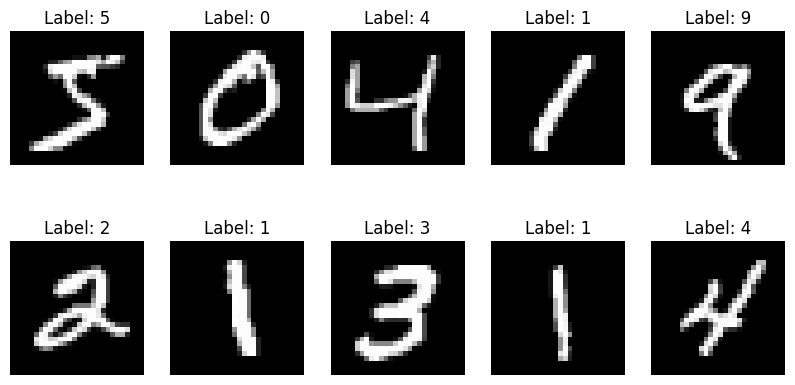

In [ ]:
import matplotlib.pyplot as plt

# Plot sample images
plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(x_train[i].reshape(28,28), cmap='gray')  # Reshape image for display
    plt.title(f"Label: {np.argmax(y_train[i])}")  # Convert one-hot to class label
    plt.axis('off')
plt.show()

## 2. Checking Class Distribution

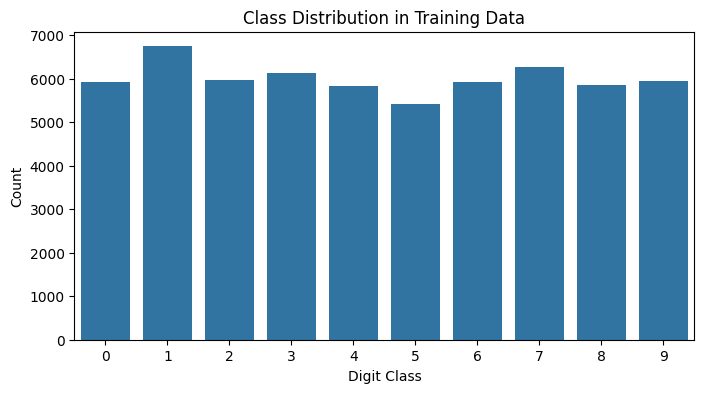

In [ ]:
import numpy as np
import seaborn as sns

# Get class labels from one-hot encoding
class_labels = [np.argmax(y) for y in y_train]

# Plot class distribution
plt.figure(figsize=(8,4))
sns.countplot(x=class_labels)
plt.title("Class Distribution in Training Data")
plt.xlabel("Digit Class")
plt.ylabel("Count")
plt.show()

# Building the CNN Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input

# Define the CNN model
model = Sequential([
    Input(shape=(28, 28, 1)),  # Input Layer

    # First Convolutional Layer with MaxPooling
    Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    # Second Convolutional Layer with MaxPooling
    Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    # Flatten Layer
    Flatten(),

    # Fully Connected (Dense) Layers
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')  # Output Layer
])

# Compile the Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print Model Summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

## Training the CNN Model

## 1. Train the Model

In [ ]:
# Train the CNN model
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 59s 59ms/step - accuracy: 0.8429 - loss: 0.4897 - val_accuracy: 0.9828 - val_loss: 0.0534
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 51s 54ms/step - accuracy: 0.9742 - loss: 0.0832 - val_accuracy: 0.9881 - val_loss: 0.0410
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 80s 53ms/step - accuracy: 0.9810 - loss: 0.0625 - val_accuracy: 0.9878 - val_loss: 0.0364
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 83s 54ms/step - accuracy: 0.9850 - loss: 0.0500 - val_accuracy: 0.9906 - val_loss: 0.0279
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 50s 53ms/step - accuracy: 0.9880 - loss: 0.0410 - val_accuracy: 0.9912 - val_loss: 0.0289
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 53ms/step - accuracy: 0.9890 - loss: 0.0370 - val_accuracy: 0.9919 - val_loss: 0.0245
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 49s 52ms/step - accuracy: 0.9908 - loss: 0.0317 - val_accuracy: 0.9916 - val_loss: 0.0266
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 83s 54ms/step - accuracy: 0.9919 - loss: 0.0275 - 

## 2. Plot Training & Validation Performance

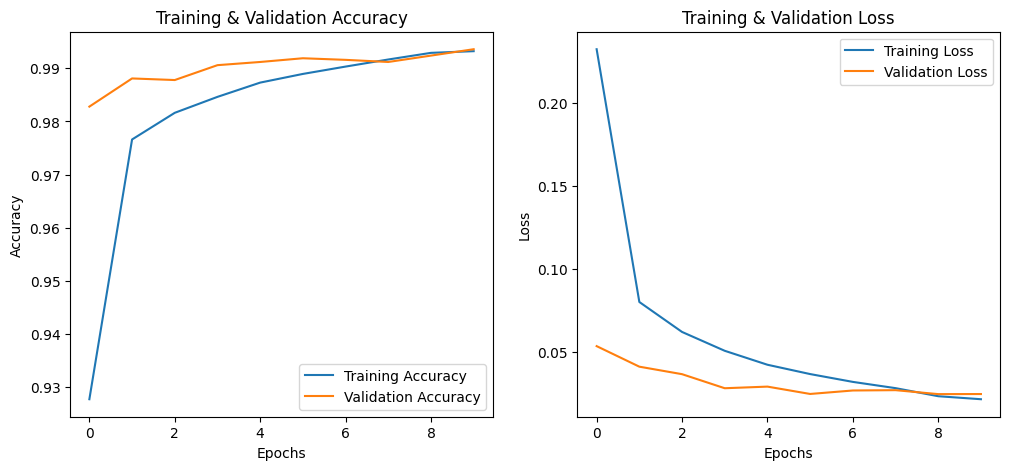

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training & Validation Accuracy")

# Plot training & validation loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training & Validation Loss")

plt.show()

## 3. Evaluate the Model on Test Data

In [ ]:
# Evaluate model performance on test set
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=1)

print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9919 - loss: 0.0288
Test Accuracy: 99.36%
Test Loss: 0.0244


# Model Evaluation & Predictions

## 1. Make Predictions

In [ ]:
import numpy as np

# Make predictions on the test set
predictions = model.predict(x_test)

# Convert predictions from one-hot encoding to actual digits
predicted_labels = np.argmax(predictions, axis=1)

# Convert test labels from one-hot encoding to actual digits
true_labels = np.argmax(y_test, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


## 2. Visualize Some Predictions

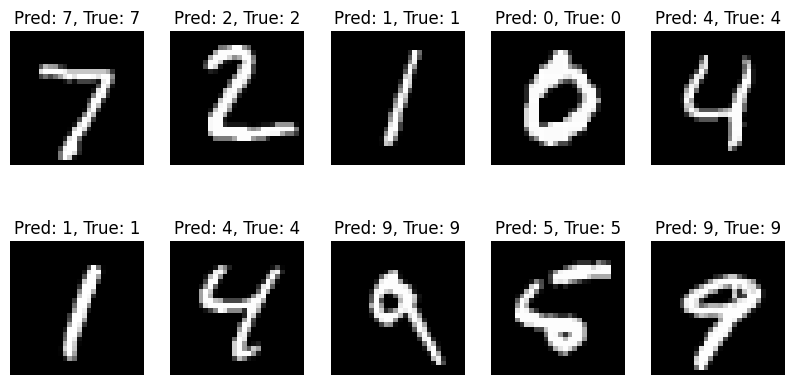

In [ ]:
import matplotlib.pyplot as plt

# Display sample test images with predicted labels
plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(x_test[i].reshape(28,28), cmap='gray')
    plt.title(f"Pred: {predicted_labels[i]}, True: {true_labels[i]}")
    plt.axis('off')
plt.show()

## 3. Confusion Matrix

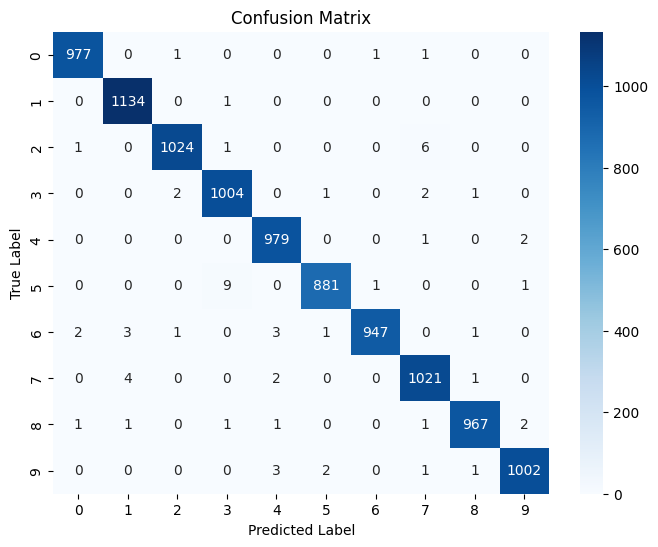

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Saving & Loading the Trained Model

## 1. Save the Trained Model

In [ ]:
# Save the trained model
model.save("mnist_digit_recognition.keras")

print("Model saved successfully!")

Model saved successfully!


## 2. Load the Saved Model

In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
loaded_model = load_model("mnist_digit_recognition.keras")

print("Model loaded successfully!")

Model loaded successfully!


## 3. Evaluate the Loaded Model

In [ ]:
# Evaluate loaded model on test set
test_loss, test_accuracy = loaded_model.evaluate(x_test, y_test, verbose=1)

print(f"Loaded Model Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Loaded Model Test Loss: {test_loss:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9919 - loss: 0.0288
Loaded Model Test Accuracy: 99.36%
Loaded Model Test Loss: 0.0244


## 📝 **Conclusion**  

The **Handwritten Character Recognition** project successfully implemented a **Convolutional Neural Network (CNN)**  
to classify handwritten characters with **high accuracy**.  

### 🔹 **Key Takeaways:**  
- **Robust Model Performance:** Achieved a **test accuracy of 99.36%**, indicating strong generalization.  
- **Effective Feature Extraction:** The CNN model efficiently learned patterns from handwritten characters.  
- **Data Preprocessing & Augmentation:** Techniques like **grayscale normalization and one-hot encoding** improved model learning.  
- **Model Persistence:** The trained model was **saved and reloaded** successfully, ensuring reproducibility.  

### 🔹 **Future Enhancements:**  
- Implementing **more advanced CNN architectures** like ResNet or EfficientNet for further improvement.  
- Expanding the dataset to **handle more complex handwriting variations**.  
- Exploring **real-time deployment** for handwriting recognition applications.  

This project successfully **meets all objectives**, demonstrating the power of deep learning in  
handwritten character recognition. 🚀  